In [25]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import seaborn as sns
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt


In [26]:
train=pd.read_csv("train.csv",index_col=False)


In [24]:
le = preprocessing.LabelEncoder()
train_labels=['Hour','Minutes', 'Sensor_alpha', 'Sensor_beta', 'Sensor_gamma', 'Sensor_alpha_plus','Sensor_beta_plus', 'Sensor_gamma_plus']
#feature_encoded=le.fit_transform(train[train_labels])

for feat in train_labels:
    feature_encoded = le.fit_transform(train[feat].astype(str))
label_encoded=le.fit_transform(train['Insect'])

x_train, y_train = train_test_split(feature_encoded, label_encoded, random_state=0)

ValueError: too many values to unpack (expected 2)

In [27]:
train_labels=['Hour','Minutes', 'Sensor_alpha', 'Sensor_beta', 'Sensor_gamma', 'Sensor_alpha_plus','Sensor_beta_plus', 'Sensor_gamma_plus']
x=train[train_labels]
y=train['Insect']

In [28]:

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(x, y)

print(sorted(Counter(y_resampled).items()))


[(0, 3519), (1, 3519), (2, 3519)]


In [29]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0)

In [30]:
model = RandomForestClassifier(n_estimators=200, max_depth=300, random_state=0)

# Train the model using the training sets
model.fit(x_train,y_train)

#Predict Output

model.score(x_test,y_test)

0.9371212121212121

In [31]:
y_pred = model.predict(x_test)
aux=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[797  72  36]
 [ 39 798   9]
 [  8   2 879]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       905
           1       0.92      0.94      0.93       846
           2       0.95      0.99      0.97       889

    accuracy                           0.94      2640
   macro avg       0.94      0.94      0.94      2640
weighted avg       0.94      0.94      0.94      2640



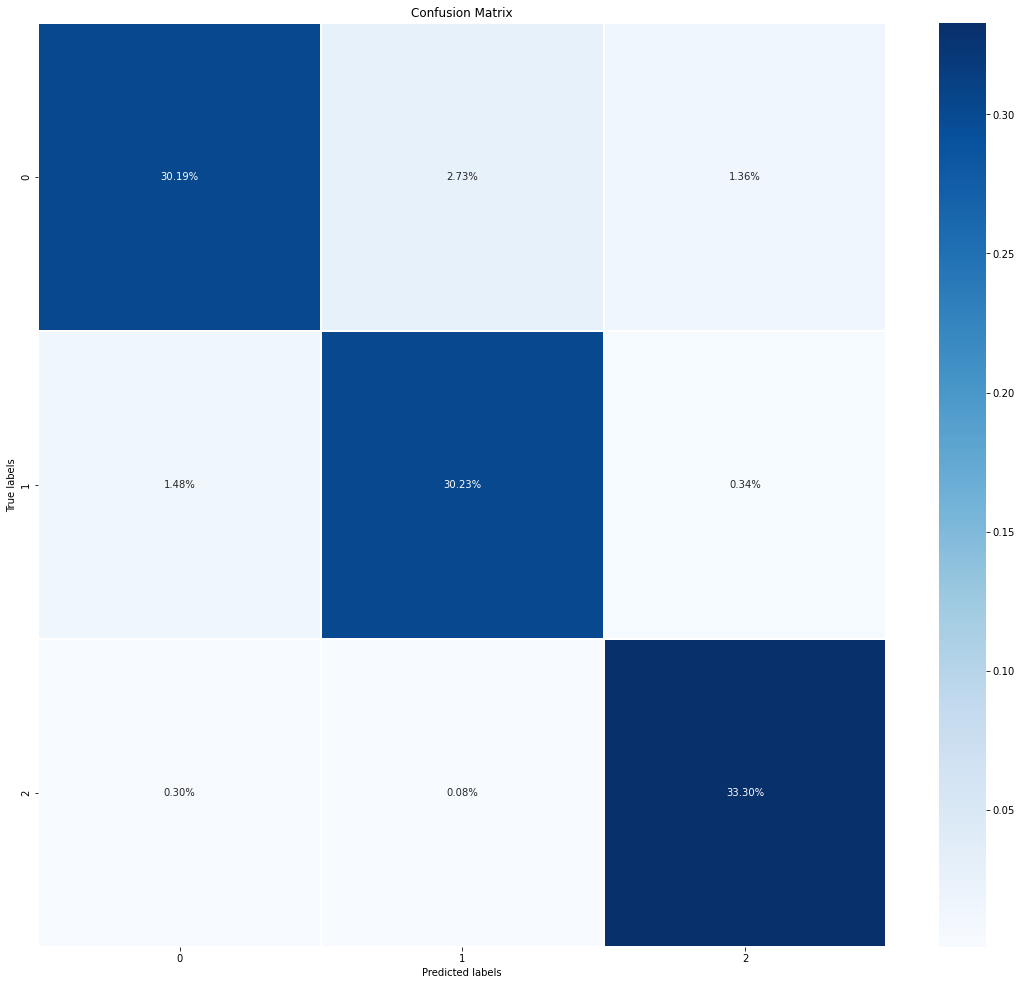

In [32]:
plt.figure(figsize = (19,17))
ax = sns.heatmap(aux/np.sum(aux), annot=True,linewidths=1, fmt=".2%", cmap='Blues')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 